In [38]:
# Player Performance Clustering - K-means with PCA
# Phase 6: Group players by performance patterns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("="*60)
print("IPL PLAYER CLUSTERING ANALYSIS")
print("="*60)

IPL PLAYER CLUSTERING ANALYSIS


In [39]:
print("\n" + "="*50)
print("LOADING PLAYER DATA")
print("="*50)

# Load player statistics
batsmen = pd.read_csv('../data/processed/player_batting_stats.csv')
bowlers = pd.read_csv('../data/processed/player_bowling_stats.csv')

# Check if first column contains player names and set as index if needed
if 'Unnamed: 0' in batsmen.columns:
    batsmen = batsmen.set_index('Unnamed: 0')
    batsmen.index.name = 'batter'
elif batsmen.columns[0] in ['batter', 'batsman', 'striker']:
    batsmen = batsmen.set_index(batsmen.columns[0])

if 'Unnamed: 0' in bowlers.columns:
    bowlers = bowlers.set_index('Unnamed: 0')
    bowlers.index.name = 'bowler'
elif bowlers.columns[0] == 'bowler':
    bowlers = bowlers.set_index('bowler')

print(f"Loaded {len(batsmen)} batsmen statistics")
print(f"Loaded {len(bowlers)} bowlers statistics")
print(f"\nBatsmen index name: {batsmen.index.name}")
print(f"Bowlers index name: {bowlers.index.name}")

# Display sample data
print("\nSample Batsmen Data:")
print(batsmen.head())
print("\nBatsmen Statistics Summary:")
print(batsmen.describe())

print("\nSample Bowlers Data:")
print(bowlers.head())
print("\nBowlers Statistics Summary:")
print(bowlers.describe())



LOADING PLAYER DATA
Loaded 300 batsmen statistics
Loaded 319 bowlers statistics

Batsmen index name: batter
Bowlers index name: bowler

Sample Batsmen Data:
                total_runs  avg_runs_per_ball  balls_faced  strike_rate
batter                                                                 
A Ashish Reddy         280               1.43          196       142.86
A Badoni               634               1.26          505       125.54
A Manohar              231               1.28          181       127.62
A Mishra               381               0.87          440        86.59
A Raghuvanshi          163               1.50          109       149.54

Batsmen Statistics Summary:
        total_runs  avg_runs_per_ball  balls_faced  strike_rate
count   300.000000         300.000000   300.000000   300.000000
mean   1065.320000           1.233100   833.286667   123.298267
std    1355.196582           0.191587  1037.161533    19.150112
min      76.000000           0.710000   100.000000   


BATSMEN CLUSTERING ANALYSIS
Batsmen feature shape: (300, 4)
Features used: ['total_runs', 'avg_runs_per_ball', 'strike_rate', 'balls_faced']

--- Applying PCA for Batsmen ---
Explained variance by components:
  PC1: 0.608 (Cumulative: 0.608)
  PC2: 0.391 (Cumulative: 0.999)
  PC3: 0.001 (Cumulative: 1.000)
  PC4: 0.000 (Cumulative: 1.000)


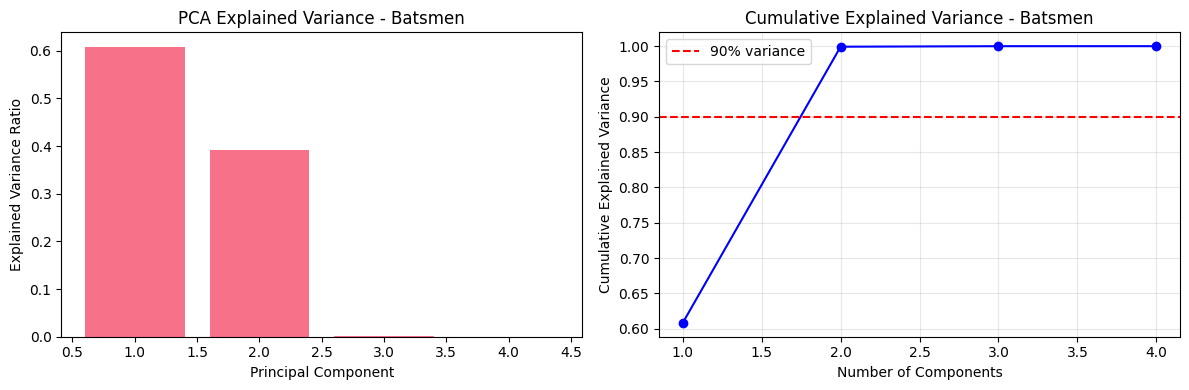


Components needed for 90% variance: 2

--- Finding Optimal Number of Clusters ---
  k=2: Inertia=736.54, Silhouette=0.378
  k=3: Inertia=411.77, Silhouette=0.449
  k=4: Inertia=300.39, Silhouette=0.414
  k=5: Inertia=220.96, Silhouette=0.431
  k=6: Inertia=180.25, Silhouette=0.409
  k=7: Inertia=152.27, Silhouette=0.427
  k=8: Inertia=129.71, Silhouette=0.429
  k=9: Inertia=111.43, Silhouette=0.433
  k=10: Inertia=97.53, Silhouette=0.390


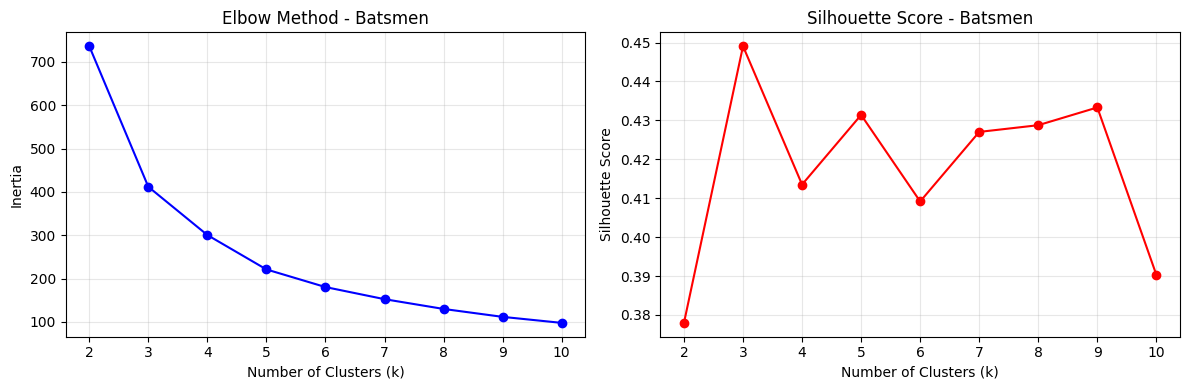


Selected optimal k: 4

Cluster distribution:
cluster
0    121
1     54
2     79
3     46
Name: count, dtype: int64


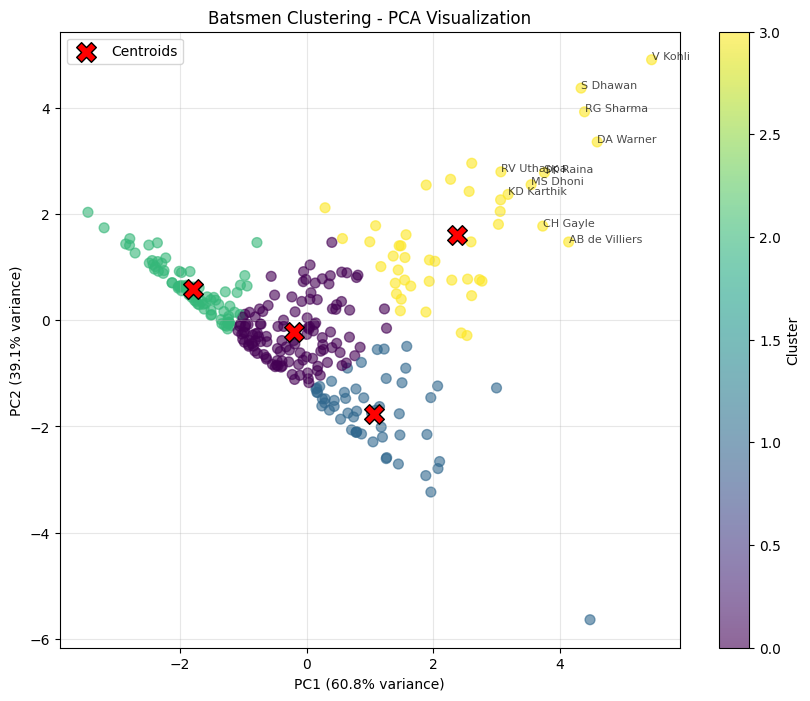


--- Cluster Characteristics (Batsmen) ---
         total_runs  strike_rate  avg_runs_per_ball  balls_faced
cluster                                                         
0            772.40       123.38               1.23       626.72
1            643.28       150.33               1.50       430.37
2            237.35       100.34               1.00       233.90
3           3753.22       130.76               1.31      2879.02

--- Cluster Interpretation (Batsmen) ---

Cluster 0:
  Type: Support Batsmen
  Description: Moderate performance across metrics
  Avg Runs: 772
  Strike Rate: 123.4
  Players: 121
  Top players: R Dravid, KS Williamson, AJ Finch

Cluster 1:
  Type: Aggressive Middle-Order
  Description: Fast scoring but moderate run volume
  Avg Runs: 643
  Strike Rate: 150.3
  Players: 54
  Top players: AD Russell, PP Shaw, N Pooran

Cluster 2:
  Type: Anchors/Accumulators
  Description: Lower strike rate but consistent run scoring
  Avg Runs: 237
  Strike Rate: 100.3
  Playe

In [40]:
print("\n" + "="*50)
print("BATSMEN CLUSTERING ANALYSIS")
print("="*50)

# Prepare features for clustering
batsmen_features = batsmen[['total_runs', 'avg_runs_per_ball', 'strike_rate', 'balls_faced']]

# Handle any missing values
batsmen_features = batsmen_features.fillna(batsmen_features.mean())

print(f"Batsmen feature shape: {batsmen_features.shape}")
print(f"Features used: {list(batsmen_features.columns)}")

# Standardize features
scaler_bat = StandardScaler()
batsmen_scaled = scaler_bat.fit_transform(batsmen_features)

print("\n--- Applying PCA for Batsmen ---")

# Apply PCA
pca_bat = PCA()
batsmen_pca = pca_bat.fit_transform(batsmen_scaled)

# Explained variance
explained_variance = pca_bat.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"Explained variance by components:")
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"  PC{i+1}: {ev:.3f} (Cumulative: {cv:.3f})")

# Visualize explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(range(1, len(explained_variance) + 1), explained_variance)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('PCA Explained Variance - Batsmen')

ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
ax2.axhline(y=0.9, color='r', linestyle='--', label='90% variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance - Batsmen')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/pca_variance_batsmen.png', dpi=100, bbox_inches='tight')
plt.show()

# Select number of components for 90% variance
n_components_bat = np.argmax(cumulative_variance >= 0.9) + 1
print(f"\nComponents needed for 90% variance: {n_components_bat}")

# Apply PCA with selected components
pca_bat_final = PCA(n_components=2)  # Using 2 for visualization
batsmen_pca_2d = pca_bat_final.fit_transform(batsmen_scaled)

print("\n--- Finding Optimal Number of Clusters ---")

# Elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(batsmen_pca_2d)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(batsmen_pca_2d, kmeans.labels_))
    print(f"  k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.3f}")

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method - Batsmen')
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score - Batsmen')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/optimal_clusters_batsmen.png', dpi=100, bbox_inches='tight')
plt.show()

# Select optimal k (let's use 4 based on elbow and silhouette)
optimal_k_bat = 4
print(f"\nSelected optimal k: {optimal_k_bat}")

# Final clustering
kmeans_bat = KMeans(n_clusters=optimal_k_bat, random_state=42, n_init=10)
batsmen['cluster'] = kmeans_bat.fit_predict(batsmen_pca_2d)

print(f"\nCluster distribution:")
print(batsmen['cluster'].value_counts().sort_index())

# Visualize clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(batsmen_pca_2d[:, 0], batsmen_pca_2d[:, 1], 
                     c=batsmen['cluster'], cmap='viridis', alpha=0.6, s=50)
plt.scatter(kmeans_bat.cluster_centers_[:, 0], kmeans_bat.cluster_centers_[:, 1],
           c='red', marker='X', s=200, edgecolors='black', label='Centroids')

# Add labels for top players
top_players = batsmen.nlargest(10, 'total_runs')
for player_name, row in top_players.iterrows():
    # Find the position of this player in the original dataframe
    try:
        idx = batsmen.index.get_loc(player_name)
        if idx < len(batsmen_pca_2d):
            # Truncate long names
            display_name = str(player_name)[:15] + '...' if len(str(player_name)) > 15 else str(player_name)
            plt.annotate(display_name, 
                        (batsmen_pca_2d[idx, 0], batsmen_pca_2d[idx, 1]),
                        fontsize=8, alpha=0.7)
    except:
        continue

plt.xlabel(f'PC1 ({pca_bat_final.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_bat_final.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Batsmen Clustering - PCA Visualization')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/batsmen_clusters_pca.png', dpi=100, bbox_inches='tight')
plt.show()

# Analyze cluster characteristics
print("\n--- Cluster Characteristics (Batsmen) ---")
cluster_stats_bat = batsmen.groupby('cluster')[['total_runs', 'strike_rate', 'avg_runs_per_ball', 'balls_faced']].mean()
print(cluster_stats_bat.round(2))

# Interpret clusters
print("\n--- Cluster Interpretation (Batsmen) ---")
for cluster_id in range(optimal_k_bat):
    cluster_data = cluster_stats_bat.loc[cluster_id]
    print(f"\nCluster {cluster_id}:")
    
    # Determine cluster type based on characteristics
    if cluster_data['strike_rate'] > 140 and cluster_data['total_runs'] > 1500:
        cluster_type = "Elite Power Hitters"
        description = "High scoring rate with substantial run contribution"
    elif cluster_data['strike_rate'] > 130 and cluster_data['total_runs'] < 1500:
        cluster_type = "Aggressive Middle-Order"
        description = "Fast scoring but moderate run volume"
    elif cluster_data['strike_rate'] < 120:
        cluster_type = "Anchors/Accumulators"
        description = "Lower strike rate but consistent run scoring"
    elif cluster_data['total_runs'] > 2000:
        cluster_type = "Elite Run Scorers"
        description = "Top tier batsmen with high run aggregates"
    else:
        cluster_type = "Support Batsmen"
        description = "Moderate performance across metrics"
    
    print(f"  Type: {cluster_type}")
    print(f"  Description: {description}")
    print(f"  Avg Runs: {cluster_data['total_runs']:.0f}")
    print(f"  Strike Rate: {cluster_data['strike_rate']:.1f}")
    print(f"  Players: {len(batsmen[batsmen['cluster'] == cluster_id])}")
    
    # Show top 3 players in cluster
    top_players = batsmen[batsmen['cluster'] == cluster_id].nlargest(3, 'total_runs')
    # Get player names from index
    player_names = [str(name) for name in top_players.index[:3]]
    print(f"  Top players: {', '.join(player_names)}")



BOWLERS CLUSTERING ANALYSIS
Wickets data verification:
Wickets range: 2 - 213
Top wicket taker: YS Chahal with 213 wickets

Bowler feature shape: (319, 4)
Features used: ['wickets', 'economy', 'bowling_average', 'balls_bowled']

Bowler features summary:
          wickets     economy  bowling_average  balls_bowled
count  319.000000  319.000000       319.000000    319.000000
mean    39.495298    8.243417        30.332257    789.341693
std     44.078822    0.870615        10.646039    847.699328
min      2.000000    6.230000        11.460000    120.000000
25%     10.500000    7.650000        24.215000    222.000000
50%     22.000000    8.150000        28.250000    432.000000
75%     48.500000    8.780000        33.770000    993.500000
max    213.000000   11.730000       102.500000   4679.000000

--- Applying PCA for Bowlers ---
Explained variance by components:
  PC1: 0.581 (Cumulative: 0.581)
  PC2: 0.250 (Cumulative: 0.831)
  PC3: 0.165 (Cumulative: 0.996)
  PC4: 0.004 (Cumulative: 1.0

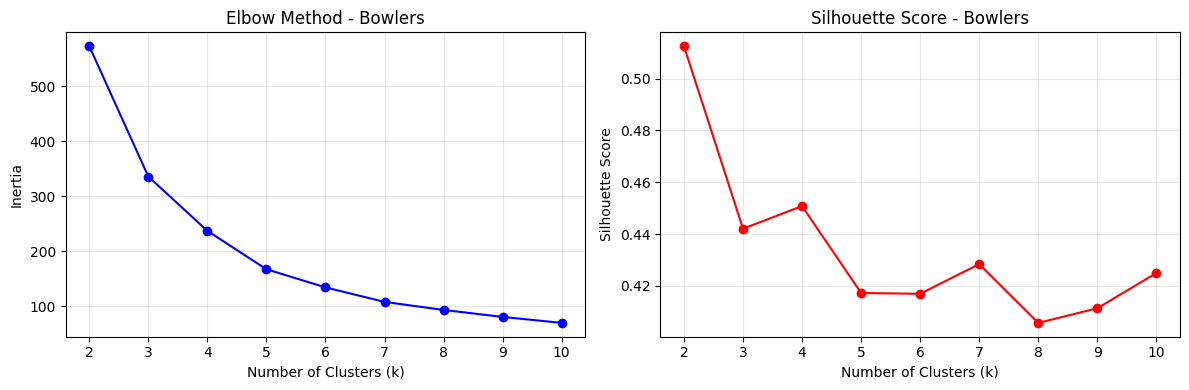


Selected k=4 for better cricket domain interpretation (silhouette for k=4: 0.451)

Selected optimal k: 4

Cluster distribution:
cluster
0     57
1    156
2     88
3     18
Name: count, dtype: int64


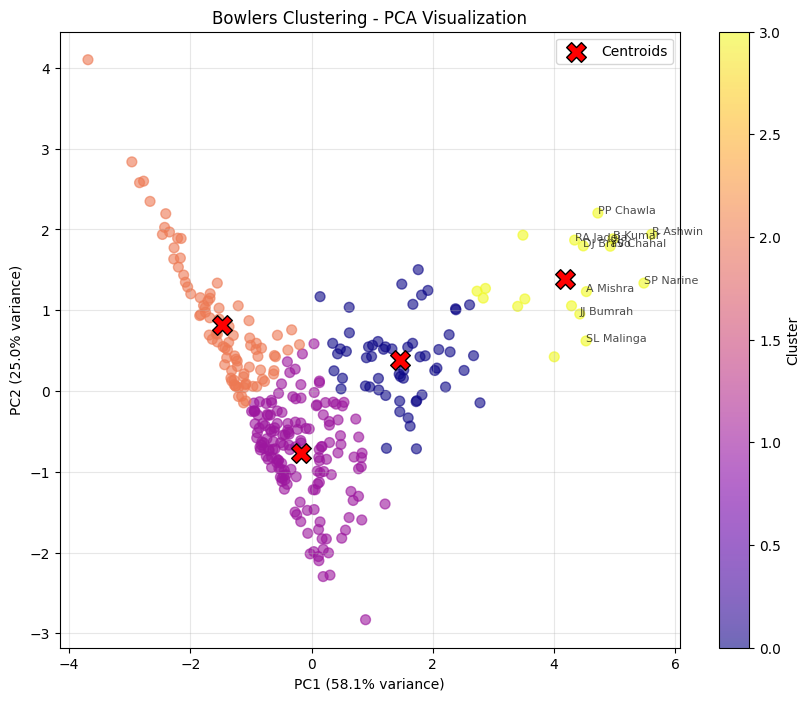


--- Cluster Characteristics (Bowlers) ---
         wickets  economy  bowling_average  balls_bowled
cluster                                                 
0          84.28     8.05            26.59       1659.79
1          22.75     7.87            26.46        456.14
2          12.53     9.17            40.89        296.08
3         174.61     7.59            24.06       3332.17

--- Cluster Interpretation (Bowlers) ---

Cluster 0:
  Type: Support Bowlers
  Description: Moderate performance, squad depth players
  Avg Wickets: 84
  Economy: 8.05
  Bowling Avg: 26.59
  Players: 57
  Top players: TA Boult, R Vinay Kumar, K Rabada

Cluster 1:
  Type: Support Bowlers
  Description: Moderate performance, squad depth players
  Avg Wickets: 23
  Economy: 7.87
  Bowling Avg: 26.46
  Players: 156
  Top players: MA Starc, S Gopal, NM Coulter-Nile

Cluster 2:
  Type: Expensive/Part-time Bowlers
  Description: Higher economy, often part-timers or death bowlers
  Avg Wickets: 13
  Economy: 9.17
 

In [41]:
print("\n" + "="*50)
print("BOWLERS CLUSTERING ANALYSIS")
print("="*50)

# Data is now correct - wickets column has real wicket counts
print("Wickets data verification:")
print(f"Wickets range: {bowlers['wickets'].min()} - {bowlers['wickets'].max()}")
print(f"Top wicket taker: {bowlers['wickets'].idxmax()} with {bowlers['wickets'].max()} wickets")

# Prepare features for clustering
# Use: wickets, economy, bowling_average, balls_bowled
bowler_features = bowlers[['wickets', 'economy', 'bowling_average', 'balls_bowled']].copy()

# Handle infinite bowling averages (bowlers with 0 wickets)
bowler_features['bowling_average'] = bowler_features['bowling_average'].replace([np.inf, -np.inf], np.nan)
bowler_features['bowling_average'] = bowler_features['bowling_average'].fillna(bowler_features['bowling_average'].median())

# Handle any remaining missing values
bowler_features = bowler_features.fillna(bowler_features.mean())

print(f"\nBowler feature shape: {bowler_features.shape}")
print(f"Features used: {list(bowler_features.columns)}")

# Show feature statistics
print("\nBowler features summary:")
print(bowler_features.describe())

# Standardize features
scaler_bowl = StandardScaler()
bowlers_scaled = scaler_bowl.fit_transform(bowler_features)

print("\n--- Applying PCA for Bowlers ---")

# Apply PCA
pca_bowl = PCA()
bowlers_pca = pca_bowl.fit_transform(bowlers_scaled)

# Explained variance
explained_variance_bowl = pca_bowl.explained_variance_ratio_
cumulative_variance_bowl = np.cumsum(explained_variance_bowl)

print(f"Explained variance by components:")
for i, (ev, cv) in enumerate(zip(explained_variance_bowl, cumulative_variance_bowl)):
    print(f"  PC{i+1}: {ev:.3f} (Cumulative: {cv:.3f})")

# Apply PCA with 2 components for visualization
pca_bowl_final = PCA(n_components=2)
bowlers_pca_2d = pca_bowl_final.fit_transform(bowlers_scaled)

print("\n--- Finding Optimal Number of Clusters ---")

# Elbow method for bowlers
inertias_bowl = []
silhouette_scores_bowl = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(bowlers_pca_2d)
    inertias_bowl.append(kmeans.inertia_)
    silhouette_scores_bowl.append(silhouette_score(bowlers_pca_2d, kmeans.labels_))
    print(f"  k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores_bowl[-1]:.3f}")

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(K_range, inertias_bowl, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method - Bowlers')
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores_bowl, 'ro-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score - Bowlers')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/optimal_clusters_bowlers.png', dpi=100, bbox_inches='tight')
plt.show()

# Force k=4 for more meaningful bowler archetypes
# (k=2 is statistically optimal but too simplistic for cricket domain)
optimal_k_bowl = 4
print(f"\nSelected k=4 for better cricket domain interpretation (silhouette for k=4: {silhouette_scores_bowl[2]:.3f})")
print(f"\nSelected optimal k: {optimal_k_bowl}")

# Final clustering for bowlers
kmeans_bowl = KMeans(n_clusters=optimal_k_bowl, random_state=42, n_init=10)
bowlers['cluster'] = kmeans_bowl.fit_predict(bowlers_pca_2d)

print(f"\nCluster distribution:")
print(bowlers['cluster'].value_counts().sort_index())

# Visualize bowler clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(bowlers_pca_2d[:, 0], bowlers_pca_2d[:, 1], 
                     c=bowlers['cluster'], cmap='plasma', alpha=0.6, s=50)
plt.scatter(kmeans_bowl.cluster_centers_[:, 0], kmeans_bowl.cluster_centers_[:, 1],
           c='red', marker='X', s=200, edgecolors='black', label='Centroids')

# Add labels for top bowlers
top_bowlers = bowlers.nlargest(10, 'wickets')
for i, (player_name, row) in enumerate(top_bowlers.iterrows()):
    try:
        idx = bowlers.index.get_loc(player_name)
        if idx < len(bowlers_pca_2d):
            display_name = str(player_name)[:15] + '...' if len(str(player_name)) > 15 else str(player_name)
            plt.annotate(display_name, 
                        (bowlers_pca_2d[idx, 0], bowlers_pca_2d[idx, 1]),
                        fontsize=8, alpha=0.7)
    except:
        continue

plt.xlabel(f'PC1 ({pca_bowl_final.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_bowl_final.explained_variance_ratio_[1]:.1%} variance)')
plt.title('Bowlers Clustering - PCA Visualization')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/bowlers_clusters_pca.png', dpi=100, bbox_inches='tight')
plt.show()

# Analyze cluster characteristics
print("\n--- Cluster Characteristics (Bowlers) ---")
cluster_stats_bowl = bowlers.groupby('cluster')[['wickets', 'economy', 'bowling_average', 'balls_bowled']].mean()
print(cluster_stats_bowl.round(2))

# Interpret clusters
print("\n--- Cluster Interpretation (Bowlers) ---")
for cluster_id in range(optimal_k_bowl):
    cluster_data = cluster_stats_bowl.loc[cluster_id]
    print(f"\nCluster {cluster_id}:")
    
    # Determine cluster type based on characteristics
    if cluster_data['wickets'] > 150 and cluster_data['economy'] < 7.5:
        cluster_type = "Elite Bowlers"
        description = "Top wicket-takers with excellent economy"
    elif cluster_data['wickets'] > 100:
        cluster_type = "Experienced Strike Bowlers"
        description = "High wicket counts, seasoned performers"
    elif cluster_data['economy'] < 7.5 and cluster_data['wickets'] > 50:
        cluster_type = "Economical Bowlers"
        description = "Focus on restricting runs with good control"
    elif cluster_data['economy'] > 8.5:
        cluster_type = "Expensive/Part-time Bowlers"
        description = "Higher economy, often part-timers or death bowlers"
    else:
        cluster_type = "Support Bowlers"
        description = "Moderate performance, squad depth players"
    
    print(f"  Type: {cluster_type}")
    print(f"  Description: {description}")
    print(f"  Avg Wickets: {cluster_data['wickets']:.0f}")
    print(f"  Economy: {cluster_data['economy']:.2f}")
    print(f"  Bowling Avg: {cluster_data['bowling_average']:.2f}")
    print(f"  Players: {len(bowlers[bowlers['cluster'] == cluster_id])}")
    
    # Show top 3 players in cluster
    top_players = bowlers[bowlers['cluster'] == cluster_id].nlargest(3, 'wickets')
    player_names = [str(name) for name in top_players.index[:3]]
    print(f"  Top players: {', '.join(player_names)}")


COMBINED ANALYSIS


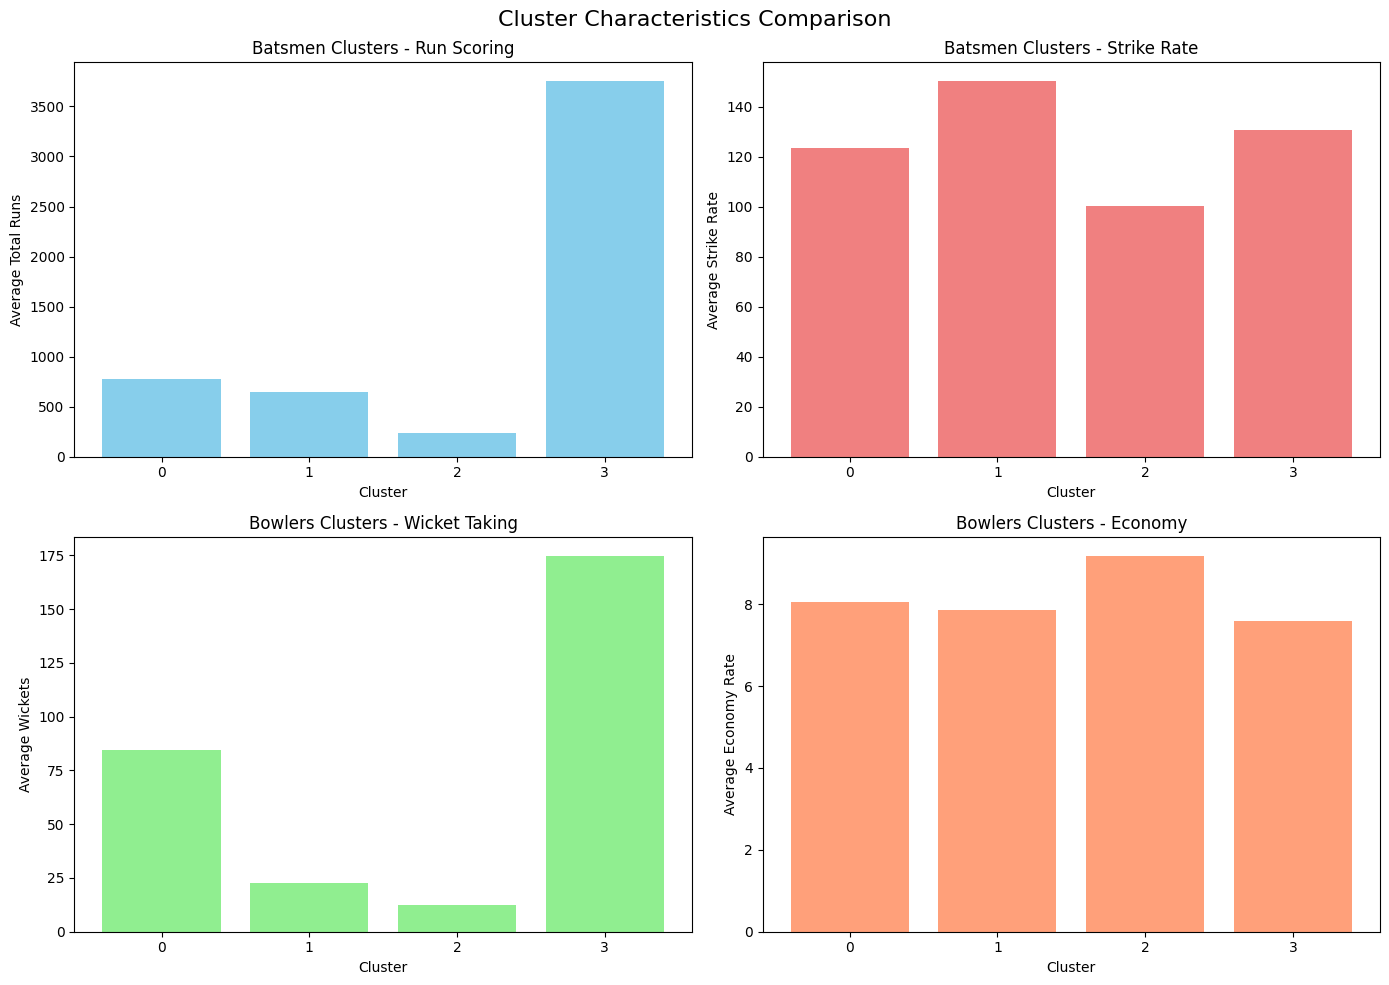

In [42]:
print("\n" + "="*50)
print("COMBINED ANALYSIS")
print("="*50)

# Create a comparison of cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Batsmen cluster characteristics
axes[0, 0].bar(range(optimal_k_bat), cluster_stats_bat['total_runs'], color='skyblue')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Average Total Runs')
axes[0, 0].set_title('Batsmen Clusters - Run Scoring')
axes[0, 0].set_xticks(range(optimal_k_bat))

axes[0, 1].bar(range(optimal_k_bat), cluster_stats_bat['strike_rate'], color='lightcoral')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Strike Rate')
axes[0, 1].set_title('Batsmen Clusters - Strike Rate')
axes[0, 1].set_xticks(range(optimal_k_bat))

# Bowlers cluster characteristics
axes[1, 0].bar(range(optimal_k_bowl), cluster_stats_bowl['wickets'], color='lightgreen')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Wickets')
axes[1, 0].set_title('Bowlers Clusters - Wicket Taking')
axes[1, 0].set_xticks(range(optimal_k_bowl))

axes[1, 1].bar(range(optimal_k_bowl), cluster_stats_bowl['economy'], color='lightsalmon')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Average Economy Rate')
axes[1, 1].set_title('Bowlers Clusters - Economy')
axes[1, 1].set_xticks(range(optimal_k_bowl))

plt.suptitle('Cluster Characteristics Comparison', fontsize=16)
plt.tight_layout()
plt.savefig('../reports/figures/cluster_characteristics_comparison.png', dpi=100, bbox_inches='tight')
plt.show()


In [43]:
print("\n" + "="*50)
print("SAVING RESULTS")
print("="*50)

# Save clustered datasets
batsmen.to_csv('../data/processed/batsmen_clustered.csv')
bowlers.to_csv('../data/processed/bowlers_clustered.csv')

# Save cluster summaries
cluster_summary = {
    'batsmen_clusters': cluster_stats_bat.round(2).to_dict(),
    'bowlers_clusters': cluster_stats_bowl.round(2).to_dict(),
    'batsmen_cluster_sizes': batsmen['cluster'].value_counts().to_dict(),
    'bowlers_cluster_sizes': bowlers['cluster'].value_counts().to_dict()
}

import json
with open('../data/processed/cluster_summary.json', 'w') as f:
    json.dump(cluster_summary, f, indent=2)

print("Saved files:")
print("  - ../data/processed/batsmen_clustered.csv")
print("  - ../data/processed/bowlers_clustered.csv")
print("  - ../data/processed/cluster_summary.json")



SAVING RESULTS
Saved files:
  - ../data/processed/batsmen_clustered.csv
  - ../data/processed/bowlers_clustered.csv
  - ../data/processed/cluster_summary.json


In [44]:
print("\n" + "="*50)
print("CLUSTERING EVALUATION METRICS")
print("="*50)

# Batsmen clustering metrics
sil_score_bat = silhouette_score(batsmen_pca_2d, batsmen['cluster'])
db_score_bat = davies_bouldin_score(batsmen_pca_2d, batsmen['cluster'])

print("\nBatsmen Clustering Metrics:")
print(f"  Silhouette Score: {sil_score_bat:.3f} (higher is better, range: -1 to 1)")
print(f"  Davies-Bouldin Score: {db_score_bat:.3f} (lower is better)")
print(f"  Inertia: {kmeans_bat.inertia_:.2f}")

# Bowlers clustering metrics
sil_score_bowl = silhouette_score(bowlers_pca_2d, bowlers['cluster'])
db_score_bowl = davies_bouldin_score(bowlers_pca_2d, bowlers['cluster'])

print("\nBowlers Clustering Metrics:")
print(f"  Silhouette Score: {sil_score_bowl:.3f} (higher is better, range: -1 to 1)")
print(f"  Davies-Bouldin Score: {db_score_bowl:.3f} (lower is better)")
print(f"  Inertia: {kmeans_bowl.inertia_:.2f}")

print("\n" + "="*50)
print("PLAYER CLUSTERING ANALYSIS COMPLETE!")
print("="*50)

print("\nKey Findings:")
print(f"- Identified {optimal_k_bat} distinct batsmen archetypes")
print(f"- Identified {optimal_k_bowl} distinct bowler archetypes")
print(f"- PCA reduced dimensionality while preserving {pca_bat_final.explained_variance_ratio_.sum():.1%} variance for batsmen")
print(f"- PCA reduced dimensionality while preserving {pca_bowl_final.explained_variance_ratio_.sum():.1%} variance for bowlers")
print("\nClusters can be used for:")
print("- Team selection strategies")
print("- Player valuation in auctions")
print("- Match-up analysis")
print("- Performance benchmarking")


CLUSTERING EVALUATION METRICS

Batsmen Clustering Metrics:
  Silhouette Score: 0.414 (higher is better, range: -1 to 1)
  Davies-Bouldin Score: 0.751 (lower is better)
  Inertia: 300.39

Bowlers Clustering Metrics:
  Silhouette Score: 0.451 (higher is better, range: -1 to 1)
  Davies-Bouldin Score: 0.689 (lower is better)
  Inertia: 236.86

PLAYER CLUSTERING ANALYSIS COMPLETE!

Key Findings:
- Identified 4 distinct batsmen archetypes
- Identified 4 distinct bowler archetypes
- PCA reduced dimensionality while preserving 99.9% variance for batsmen
- PCA reduced dimensionality while preserving 83.1% variance for bowlers

Clusters can be used for:
- Team selection strategies
- Player valuation in auctions
- Match-up analysis
- Performance benchmarking


In [45]:
# Show bowler cluster details
print("--- Cluster Characteristics (Bowlers) ---")
cluster_stats_bowl = bowlers.groupby('cluster')[['wickets', 'economy', 'bowling_average', 'balls_bowled']].mean()
print(cluster_stats_bowl.round(2))

print("\n--- Sample players per cluster ---")
for cluster_id in bowlers['cluster'].unique():
    print(f"\nCluster {cluster_id}:")
    cluster_players = bowlers[bowlers['cluster'] == cluster_id].nlargest(5, 'wickets')
    print(cluster_players[['wickets', 'economy', 'bowling_average']])

--- Cluster Characteristics (Bowlers) ---
         wickets  economy  bowling_average  balls_bowled
cluster                                                 
0          84.28     8.05            26.59       1659.79
1          22.75     7.87            26.46        456.14
2          12.53     9.17            40.89        296.08
3         174.61     7.59            24.06       3332.17

--- Sample players per cluster ---

Cluster 1:
                 wickets  economy  bowling_average
bowler                                            
MA Starc              59     8.02            19.92
S Gopal               53     8.15            25.62
NM Coulter-Nile       52     7.57            21.63
A Kumble              49     6.65            22.22
JC Archer             49     7.36            24.69

Cluster 3:
           wickets  economy  bowling_average
bowler                                      
YS Chahal      213     7.74            21.98
DJ Bravo       207     8.08            21.43
PP Chawla      201 

In [54]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

batsmen_archetype_names = {
    0: 'Sheet Anchors',
    1: 'Power Hitters',
    2: 'Tail-enders',
    3: 'Run Machines'
}

bowler_archetype_names = {
    0: 'Experienced Wicket-Takers',
    1: 'Economy Specialists',
    2: 'Part-time Bowlers',
    3: 'Elite Strike Bowlers'
}

colors_bat = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']
colors_bowl = ['#e67e22', '#1abc9c', '#8e44ad', '#34495e']

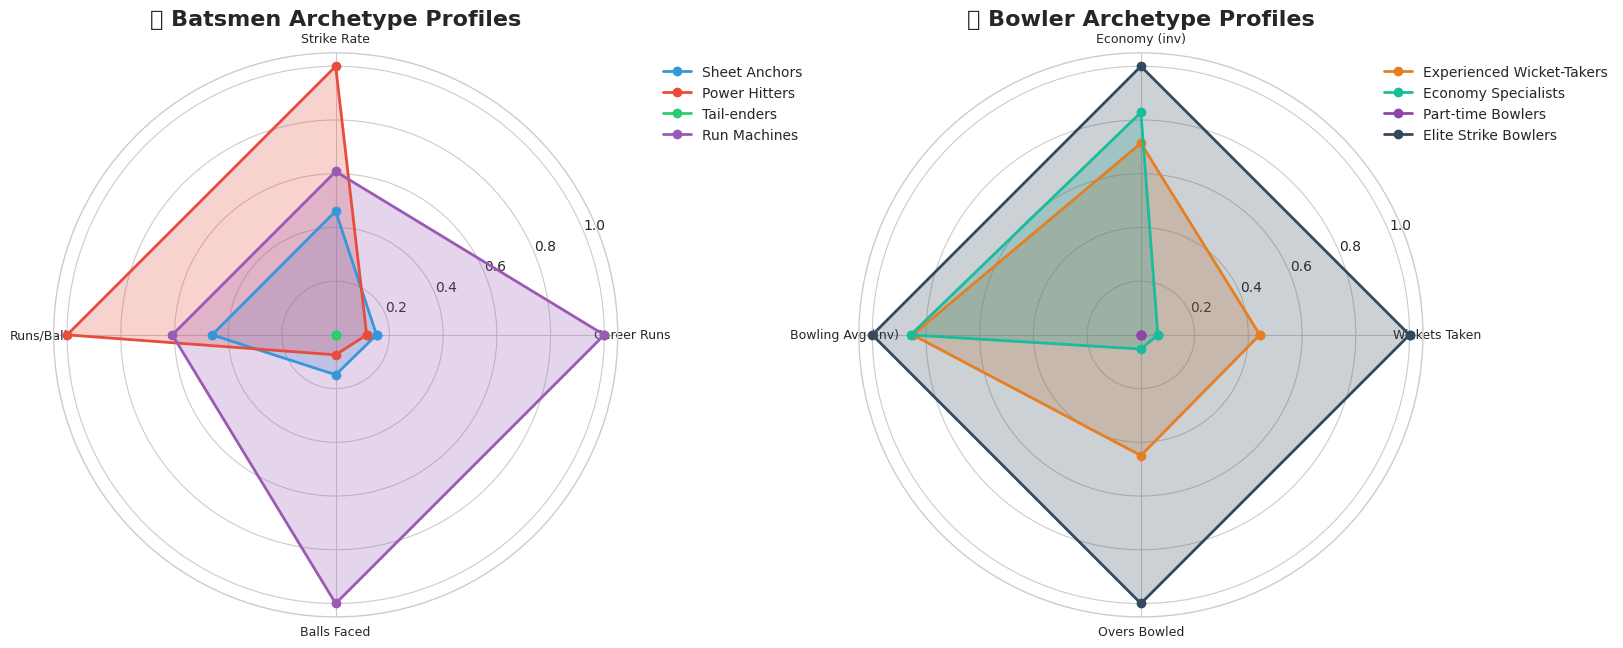

✓ Radar charts saved!


In [55]:
def create_radar_chart(ax, categories, values, label, color, alpha=0.25):
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    values = list(values) + [values[0]]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, values, alpha=alpha, color=color)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=9)

def normalize_stats(df):
    return (df - df.min()) / (df.max() - df.min())

fig, axes = plt.subplots(1, 2, figsize=(16, 7), subplot_kw=dict(projection='polar'))

batsmen_cluster_stats = batsmen.groupby('cluster')[['total_runs', 'strike_rate', 'avg_runs_per_ball', 'balls_faced']].mean()
batsmen_normalized = normalize_stats(batsmen_cluster_stats)

categories_bat = ['Career Runs', 'Strike Rate', 'Runs/Ball', 'Balls Faced']

ax1 = axes[0]
for i, (cluster_id, row) in enumerate(batsmen_normalized.iterrows()):
    create_radar_chart(ax1, categories_bat, row.values, 
                      batsmen_archetype_names[cluster_id], colors_bat[i])

ax1.set_title('🏏 Batsmen Archetype Profiles', size=16, fontweight='bold', pad=20)
ax1.legend(loc='upper right', bbox_to_anchor=(1.35, 1.0))

bowlers_cluster_stats = bowlers.groupby('cluster')[['wickets', 'economy', 'bowling_average', 'balls_bowled']].mean()
bowlers_normalized = normalize_stats(bowlers_cluster_stats)
bowlers_normalized['economy'] = 1 - bowlers_normalized['economy']
bowlers_normalized['bowling_average'] = 1 - bowlers_normalized['bowling_average']

categories_bowl = ['Wickets Taken', 'Economy (inv)', 'Bowling Avg (inv)', 'Overs Bowled']

ax2 = axes[1]
for i, (cluster_id, row) in enumerate(bowlers_normalized.iterrows()):
    create_radar_chart(ax2, categories_bowl, row.values,
                      bowler_archetype_names[cluster_id], colors_bowl[i])

ax2.set_title('🎯 Bowler Archetype Profiles', size=16, fontweight='bold', pad=20)
ax2.legend(loc='upper right', bbox_to_anchor=(1.35, 1.0))

plt.tight_layout()
plt.savefig('../reports/figures/cluster_radar_profiles.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Radar charts saved!")

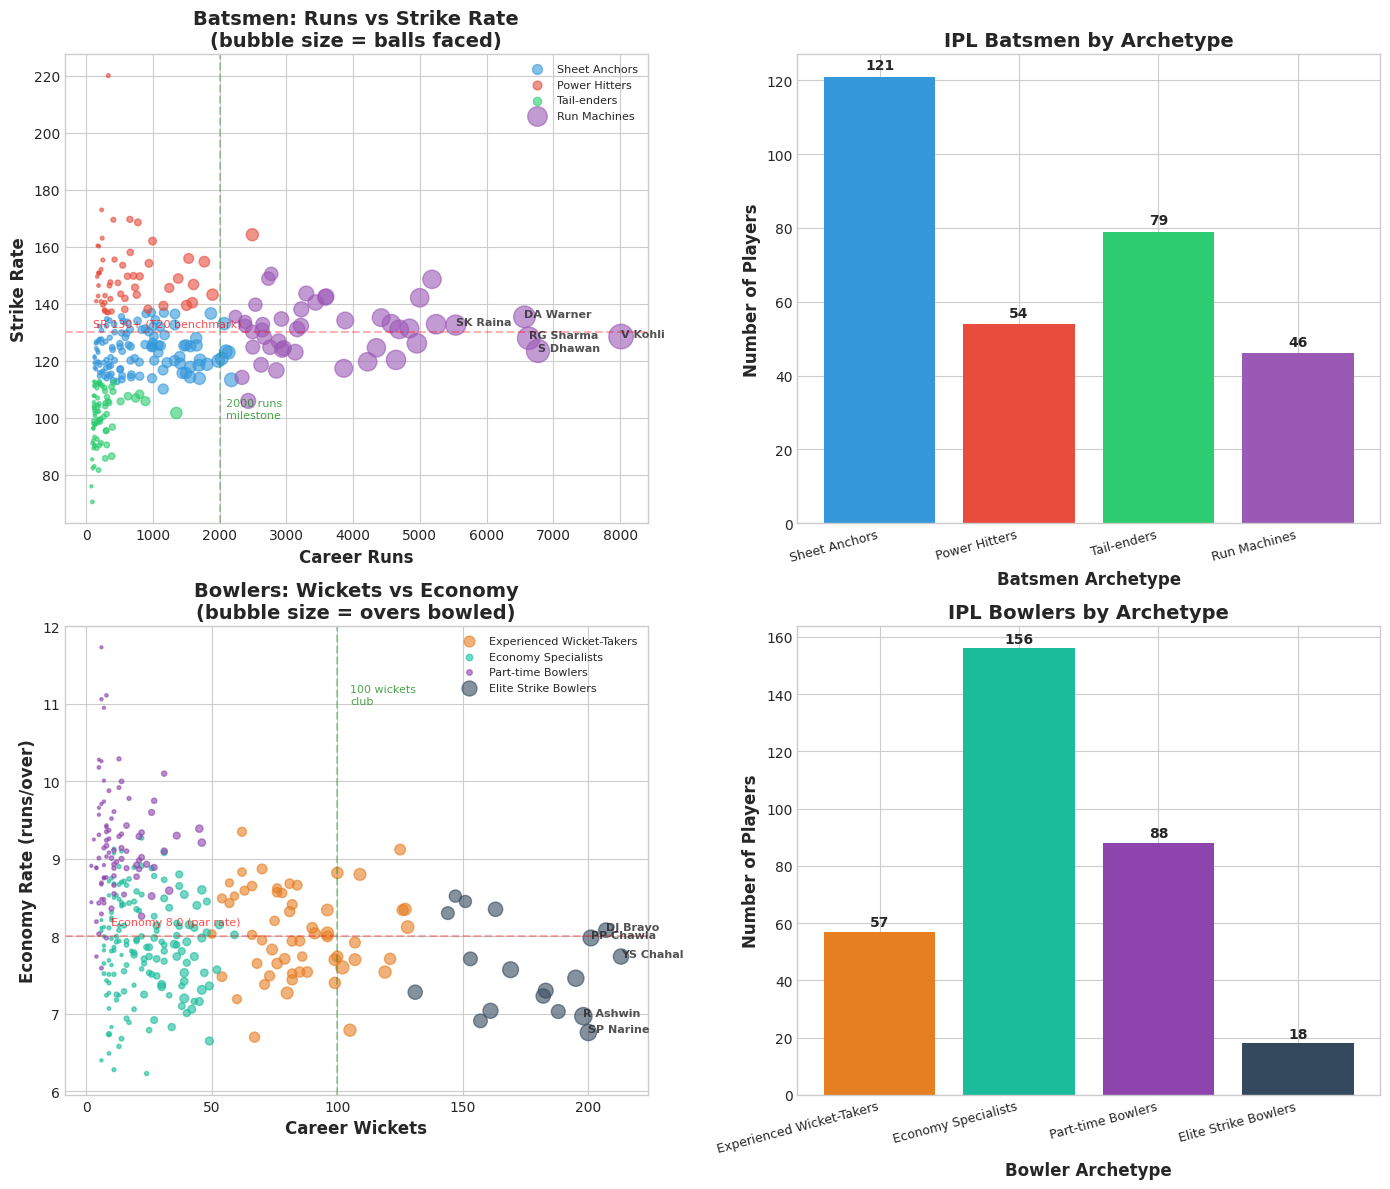

✓ Scatter analysis saved!


In [56]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

ax1 = axes[0, 0]
for cluster_id in sorted(batsmen['cluster'].unique()):
    cluster_data = batsmen[batsmen['cluster'] == cluster_id]
    scatter = ax1.scatter(cluster_data['total_runs'], cluster_data['strike_rate'], 
                         s=cluster_data['balls_faced']/20, alpha=0.6, 
                         label=batsmen_archetype_names[cluster_id], c=colors_bat[cluster_id])

elite_batsmen = batsmen.nlargest(5, 'total_runs')
for name, row in elite_batsmen.iterrows():
    ax1.annotate(name, (row['total_runs'], row['strike_rate']), 
                fontsize=8, alpha=0.8, fontweight='bold')

ax1.set_xlabel('Career Runs', fontweight='bold')
ax1.set_ylabel('Strike Rate', fontweight='bold')
ax1.set_title('Batsmen: Runs vs Strike Rate\n(bubble size = balls faced)', fontweight='bold')
ax1.legend(loc='upper right', fontsize=8)
ax1.axhline(y=130, color='red', linestyle='--', alpha=0.3)
ax1.axvline(x=2000, color='green', linestyle='--', alpha=0.3)
ax1.text(2100, 100, '2000 runs\nmilestone', fontsize=8, color='green', alpha=0.7)
ax1.text(100, 132, 'SR 130+ (T20 benchmark)', fontsize=8, color='red', alpha=0.7)

ax2 = axes[0, 1]
cluster_counts_bat = batsmen['cluster'].value_counts().sort_index()
archetype_labels = [batsmen_archetype_names[i] for i in cluster_counts_bat.index]
bars = ax2.bar(range(len(cluster_counts_bat)), cluster_counts_bat.values, color=colors_bat)
ax2.set_xticks(range(len(cluster_counts_bat)))
ax2.set_xticklabels(archetype_labels, rotation=15, ha='right', fontsize=9)
ax2.set_xlabel('Batsmen Archetype', fontweight='bold')
ax2.set_ylabel('Number of Players', fontweight='bold')
ax2.set_title('IPL Batsmen by Archetype', fontweight='bold')

for bar, val in zip(bars, cluster_counts_bat.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
            str(val), ha='center', fontweight='bold')

ax3 = axes[1, 0]
for cluster_id in sorted(bowlers['cluster'].unique()):
    cluster_data = bowlers[bowlers['cluster'] == cluster_id]
    ax3.scatter(cluster_data['wickets'], cluster_data['economy'], 
               s=cluster_data['balls_bowled']/30, alpha=0.6,
               label=bowler_archetype_names[cluster_id], c=colors_bowl[cluster_id])

elite_bowlers = bowlers.nlargest(5, 'wickets')
for name, row in elite_bowlers.iterrows():
    ax3.annotate(name, (row['wickets'], row['economy']), 
                fontsize=8, alpha=0.8, fontweight='bold')

ax3.set_xlabel('Career Wickets', fontweight='bold')
ax3.set_ylabel('Economy Rate (runs/over)', fontweight='bold')
ax3.set_title('Bowlers: Wickets vs Economy\n(bubble size = overs bowled)', fontweight='bold')
ax3.legend(loc='upper right', fontsize=8)
ax3.axhline(y=8.0, color='red', linestyle='--', alpha=0.3)
ax3.axvline(x=100, color='green', linestyle='--', alpha=0.3)
ax3.text(105, 11, '100 wickets\nclub', fontsize=8, color='green', alpha=0.7)
ax3.text(10, 8.15, 'Economy 8.0 (par rate)', fontsize=8, color='red', alpha=0.7)

ax4 = axes[1, 1]
cluster_counts_bowl = bowlers['cluster'].value_counts().sort_index()
archetype_labels_bowl = [bowler_archetype_names[i] for i in cluster_counts_bowl.index]
bars = ax4.bar(range(len(cluster_counts_bowl)), cluster_counts_bowl.values, 
               color=colors_bowl[:len(cluster_counts_bowl)])
ax4.set_xticks(range(len(cluster_counts_bowl)))
ax4.set_xticklabels(archetype_labels_bowl, rotation=15, ha='right', fontsize=9)
ax4.set_xlabel('Bowler Archetype', fontweight='bold')
ax4.set_ylabel('Number of Players', fontweight='bold')
ax4.set_title('IPL Bowlers by Archetype', fontweight='bold')

for bar, val in zip(bars, cluster_counts_bowl.values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
            str(val), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/cluster_scatter_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Scatter analysis saved!")

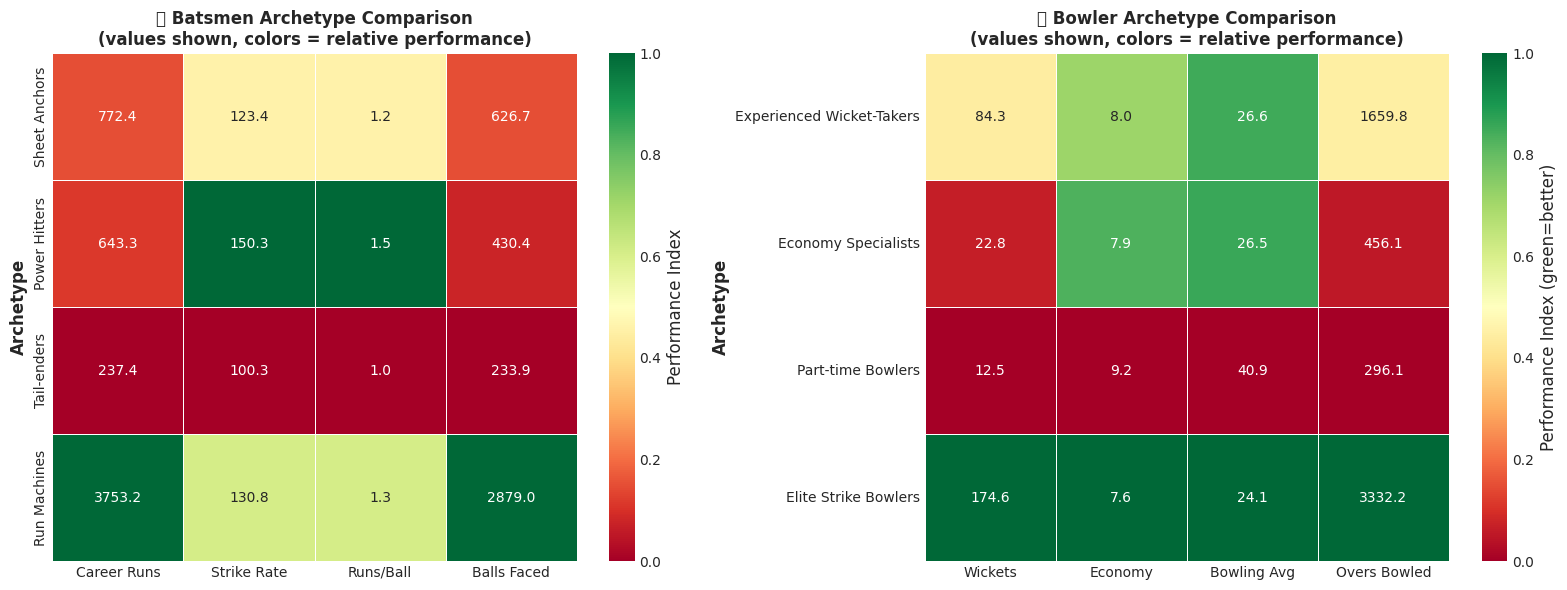

✓ Heatmap comparison saved!


In [57]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

batsmen_cluster_stats = batsmen.groupby('cluster')[['total_runs', 'strike_rate', 'avg_runs_per_ball', 'balls_faced']].mean()
batsmen_cluster_stats.index = [batsmen_archetype_names[i] for i in batsmen_cluster_stats.index]
batsmen_cluster_stats.columns = ['Career Runs', 'Strike Rate', 'Runs/Ball', 'Balls Faced']

batsmen_heatmap = (batsmen_cluster_stats - batsmen_cluster_stats.min()) / (batsmen_cluster_stats.max() - batsmen_cluster_stats.min())

sns.heatmap(batsmen_heatmap, annot=batsmen_cluster_stats.round(1), fmt='', cmap='RdYlGn',
           ax=axes[0], cbar_kws={'label': 'Performance Index'}, linewidths=0.5)
axes[0].set_title('🏏 Batsmen Archetype Comparison\n(values shown, colors = relative performance)', fontweight='bold', size=12)
axes[0].set_ylabel('Archetype', fontweight='bold')

bowlers_cluster_stats = bowlers.groupby('cluster')[['wickets', 'economy', 'bowling_average', 'balls_bowled']].mean()
bowlers_cluster_stats.index = [bowler_archetype_names[i] for i in bowlers_cluster_stats.index]
bowlers_cluster_stats.columns = ['Wickets', 'Economy', 'Bowling Avg', 'Overs Bowled']

bowlers_heatmap = bowlers_cluster_stats.copy()
bowlers_heatmap = (bowlers_heatmap - bowlers_heatmap.min()) / (bowlers_heatmap.max() - bowlers_heatmap.min())
bowlers_heatmap['Economy'] = 1 - bowlers_heatmap['Economy']
bowlers_heatmap['Bowling Avg'] = 1 - bowlers_heatmap['Bowling Avg']

sns.heatmap(bowlers_heatmap, annot=bowlers_cluster_stats.round(1), fmt='', cmap='RdYlGn',
           ax=axes[1], cbar_kws={'label': 'Performance Index (green=better)'}, linewidths=0.5)
axes[1].set_title('🎯 Bowler Archetype Comparison\n(values shown, colors = relative performance)', fontweight='bold', size=12)
axes[1].set_ylabel('Archetype', fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/cluster_heatmap_comparison.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Heatmap comparison saved!")

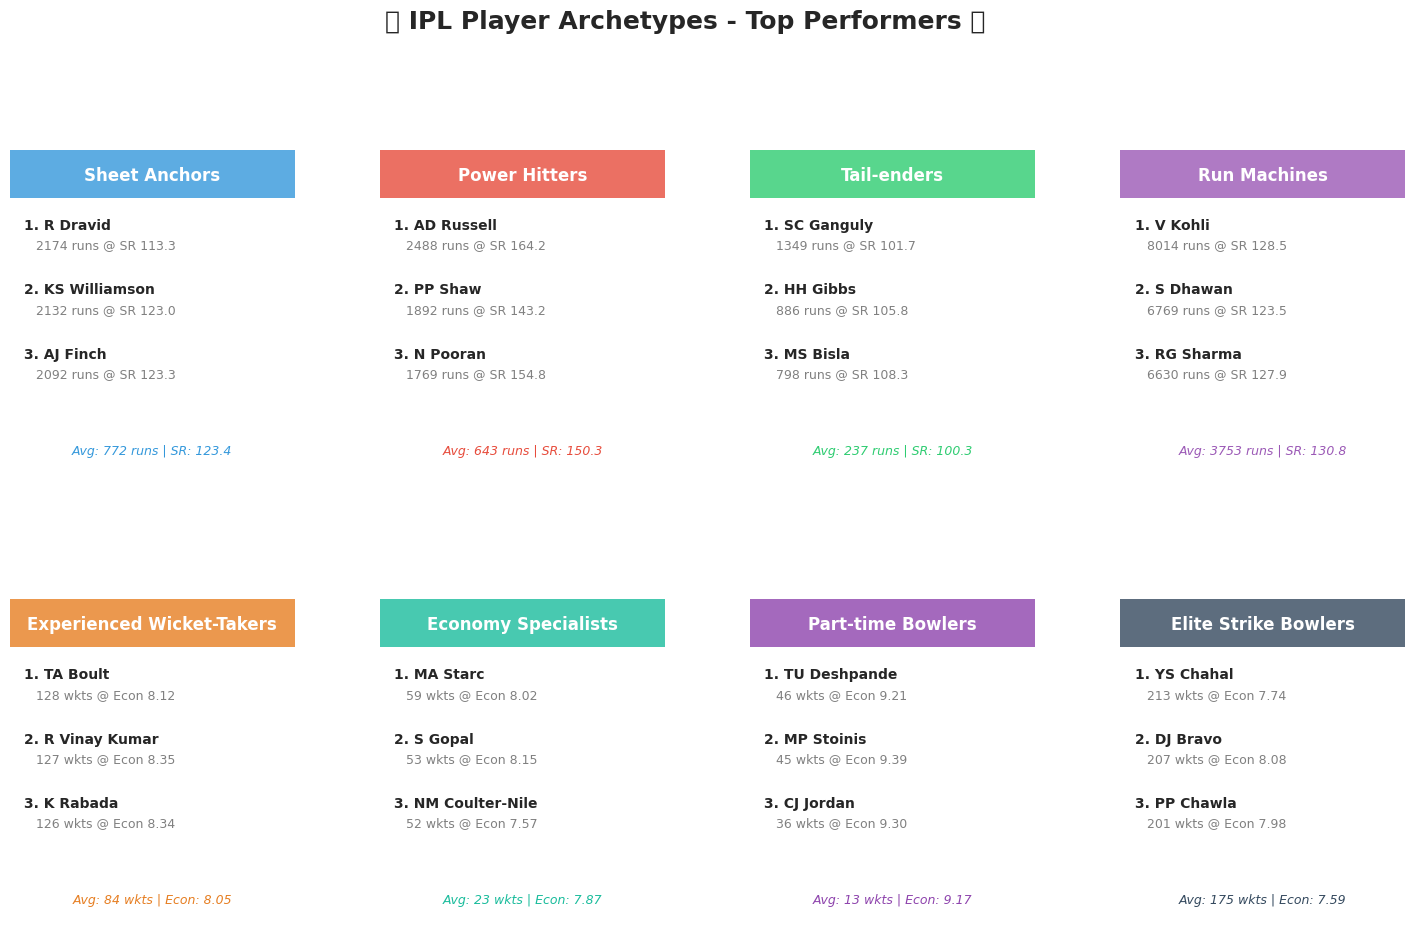

✓ Top players showcase saved!


In [58]:
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 4, hspace=0.4, wspace=0.3)

for i in range(4):
    ax = fig.add_subplot(gs[0, i])
    
    cluster_batsmen = batsmen[batsmen['cluster'] == i].nlargest(3, 'total_runs')
    
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    ax.add_patch(plt.Rectangle((0, 8.5), 10, 1.5, facecolor=colors_bat[i], alpha=0.8))
    ax.text(5, 9.2, batsmen_archetype_names[i], ha='center', va='center', 
           fontsize=12, fontweight='bold', color='white')
    
    y_pos = 7.5
    for rank, (name, row) in enumerate(cluster_batsmen.iterrows(), 1):
        ax.text(0.5, y_pos, f"{rank}. {name}", fontsize=10, fontweight='bold')
        ax.text(0.5, y_pos-0.6, f"   {row['total_runs']:.0f} runs @ SR {row['strike_rate']:.1f}", 
               fontsize=9, color='gray')
        y_pos -= 2
    
    cluster_avg = batsmen[batsmen['cluster'] == i]['total_runs'].mean()
    cluster_sr = batsmen[batsmen['cluster'] == i]['strike_rate'].mean()
    ax.text(5, 0.5, f"Avg: {cluster_avg:.0f} runs | SR: {cluster_sr:.1f}", 
           ha='center', fontsize=9, style='italic', color=colors_bat[i])

n_bowl_clusters = len(bowlers['cluster'].unique())
for i in range(min(4, n_bowl_clusters)):
    ax = fig.add_subplot(gs[1, i])
    
    cluster_bowlers_data = bowlers[bowlers['cluster'] == i].nlargest(3, 'wickets')
    
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    ax.add_patch(plt.Rectangle((0, 8.5), 10, 1.5, facecolor=colors_bowl[i], alpha=0.8))
    ax.text(5, 9.2, bowler_archetype_names[i], ha='center', va='center', 
           fontsize=12, fontweight='bold', color='white')
    
    y_pos = 7.5
    for rank, (name, row) in enumerate(cluster_bowlers_data.iterrows(), 1):
        ax.text(0.5, y_pos, f"{rank}. {name}", fontsize=10, fontweight='bold')
        ax.text(0.5, y_pos-0.6, f"   {row['wickets']:.0f} wkts @ Econ {row['economy']:.2f}", 
               fontsize=9, color='gray')
        y_pos -= 2
    
    cluster_avg_wkts = bowlers[bowlers['cluster'] == i]['wickets'].mean()
    cluster_econ = bowlers[bowlers['cluster'] == i]['economy'].mean()
    ax.text(5, 0.5, f"Avg: {cluster_avg_wkts:.0f} wkts | Econ: {cluster_econ:.2f}", 
           ha='center', fontsize=9, style='italic', color=colors_bowl[i])

for i in range(n_bowl_clusters, 4):
    ax = fig.add_subplot(gs[1, i])
    ax.axis('off')

plt.suptitle('🏏 IPL Player Archetypes - Top Performers 🏆', 
            fontsize=18, fontweight='bold', y=1.02)
plt.savefig('../reports/figures/top_players_showcase.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Top players showcase saved!")

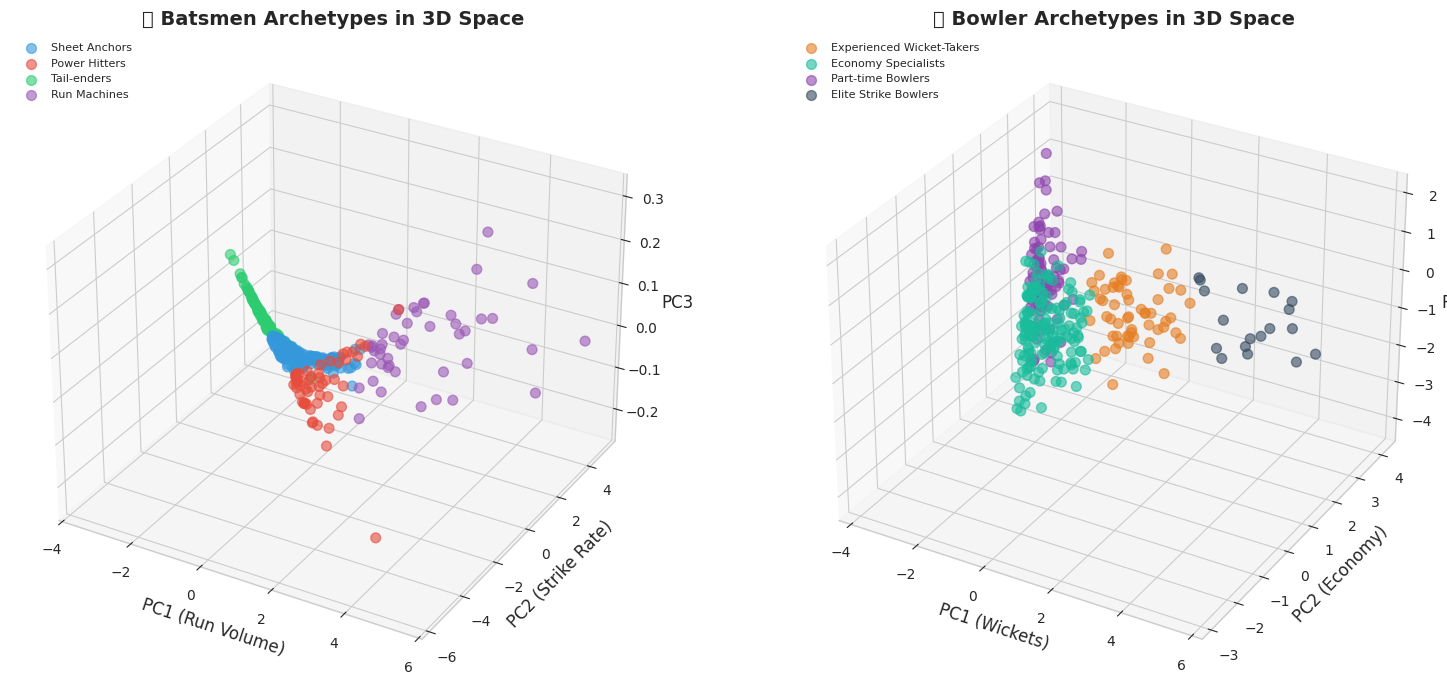

✓ 3D PCA visualization saved!


In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 7))

ax1 = fig.add_subplot(121, projection='3d')

pca_bat_3d = PCA(n_components=3)
batsmen_3d = pca_bat_3d.fit_transform(StandardScaler().fit_transform(
    batsmen[['total_runs', 'strike_rate', 'avg_runs_per_ball', 'balls_faced']]))

for cluster_id in sorted(batsmen['cluster'].unique()):
    mask = batsmen['cluster'] == cluster_id
    ax1.scatter(batsmen_3d[mask, 0], batsmen_3d[mask, 1], batsmen_3d[mask, 2],
               c=colors_bat[cluster_id], label=batsmen_archetype_names[cluster_id], 
               alpha=0.6, s=50)

ax1.set_xlabel('PC1 (Run Volume)')
ax1.set_ylabel('PC2 (Strike Rate)')
ax1.set_zlabel('PC3')
ax1.set_title('🏏 Batsmen Archetypes in 3D Space', fontweight='bold', size=14)
ax1.legend(fontsize=8, loc='upper left')

ax2 = fig.add_subplot(122, projection='3d')

bowler_features_3d = bowlers[['wickets', 'economy', 'bowling_average', 'balls_bowled']].copy()
bowler_features_3d['bowling_average'] = bowler_features_3d['bowling_average'].replace([np.inf, -np.inf], np.nan)
bowler_features_3d = bowler_features_3d.fillna(bowler_features_3d.median())

pca_bowl_3d = PCA(n_components=3)
bowlers_3d = pca_bowl_3d.fit_transform(StandardScaler().fit_transform(bowler_features_3d))

for cluster_id in sorted(bowlers['cluster'].unique()):
    mask = bowlers['cluster'] == cluster_id
    ax2.scatter(bowlers_3d[mask, 0], bowlers_3d[mask, 1], bowlers_3d[mask, 2],
               c=colors_bowl[cluster_id], label=bowler_archetype_names[cluster_id], 
               alpha=0.6, s=50)

ax2.set_xlabel('PC1 (Wickets)')
ax2.set_ylabel('PC2 (Economy)')
ax2.set_zlabel('PC3')
ax2.set_title('🎯 Bowler Archetypes in 3D Space', fontweight='bold', size=14)
ax2.legend(fontsize=8, loc='upper left')

plt.tight_layout()
plt.savefig('../reports/figures/cluster_3d_pca.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ 3D PCA visualization saved!")

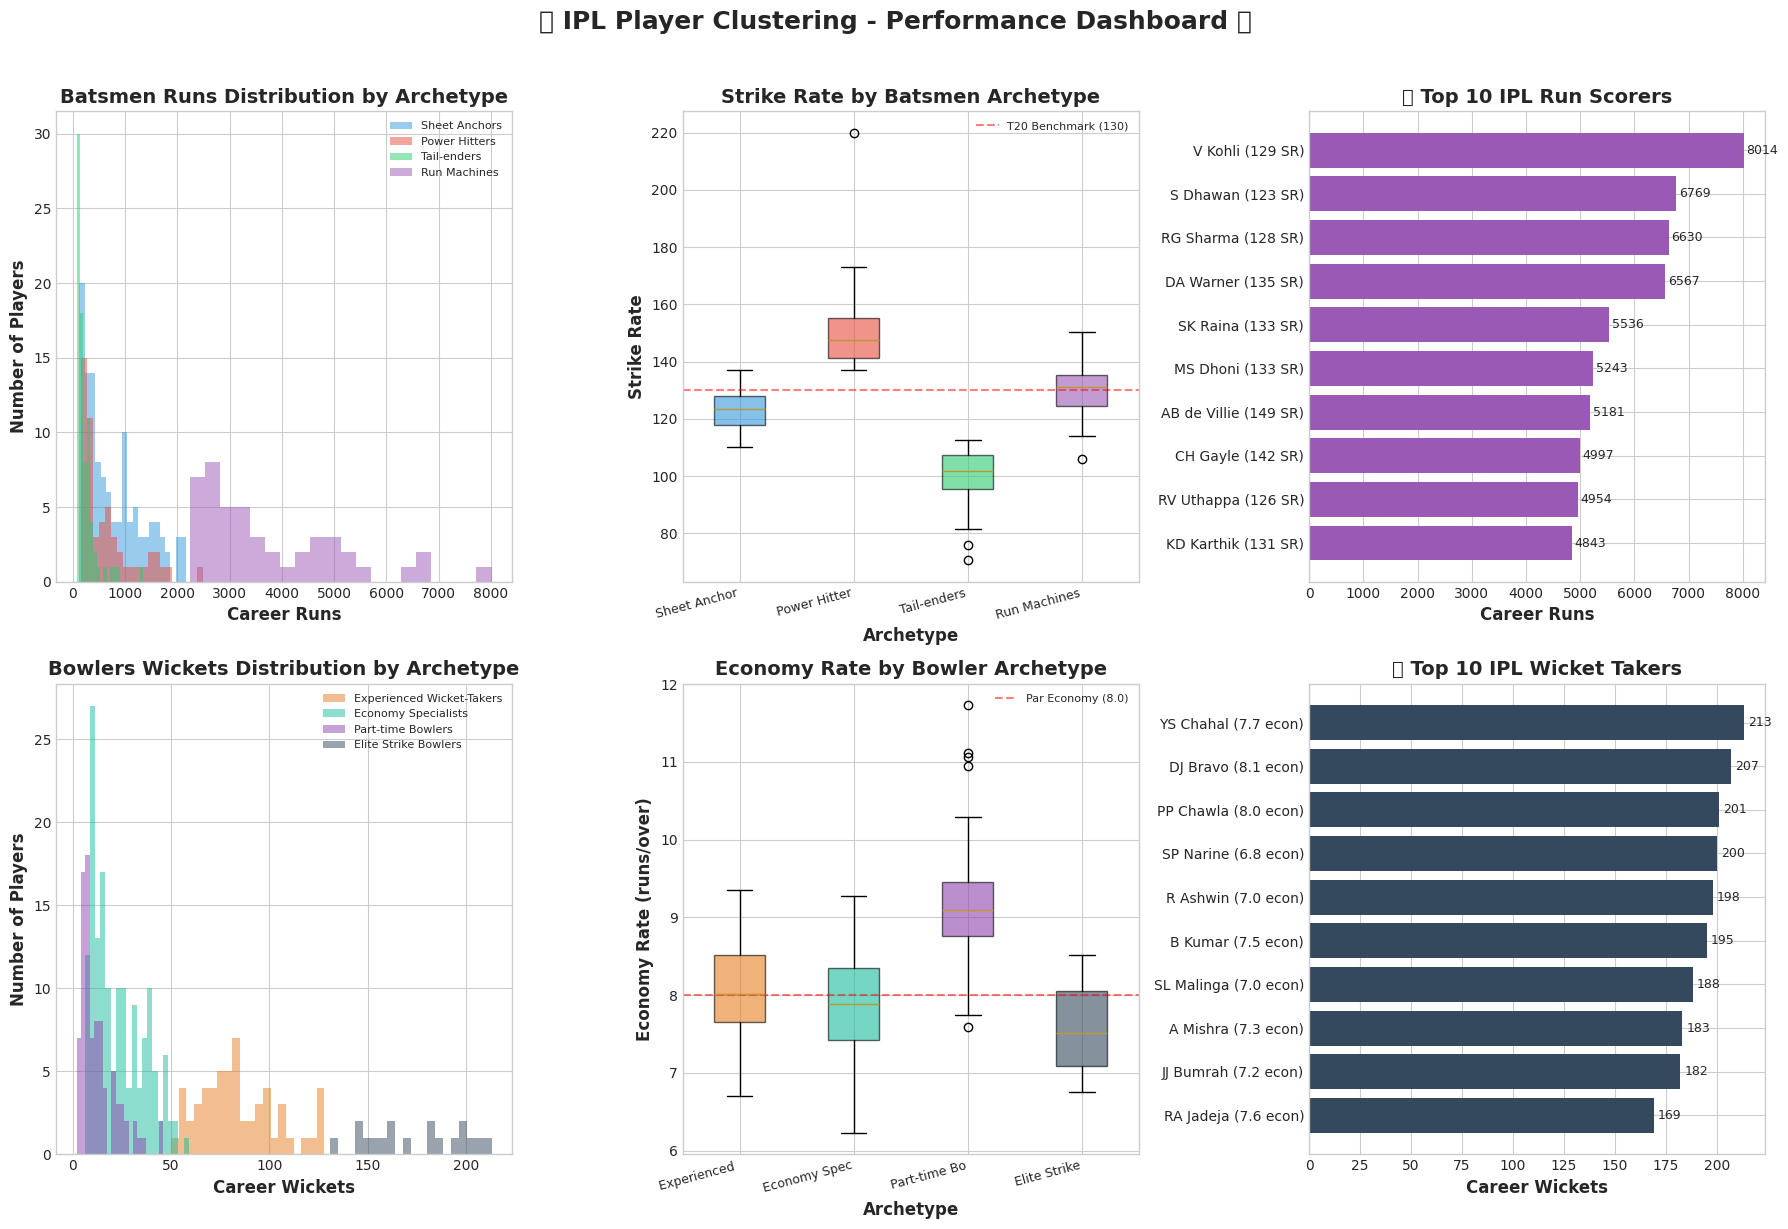

✓ Dashboard saved!


In [60]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

ax = axes[0, 0]
for i in sorted(batsmen['cluster'].unique()):
    data = batsmen[batsmen['cluster'] == i]['total_runs']
    ax.hist(data, bins=20, alpha=0.5, label=batsmen_archetype_names[i], color=colors_bat[i])
ax.set_xlabel('Career Runs', fontweight='bold')
ax.set_ylabel('Number of Players', fontweight='bold')
ax.set_title('Batsmen Runs Distribution by Archetype', fontweight='bold')
ax.legend(fontsize=8)

ax = axes[0, 1]
batsmen_box_data = [batsmen[batsmen['cluster'] == i]['strike_rate'].values 
                    for i in sorted(batsmen['cluster'].unique())]
bp = ax.boxplot(batsmen_box_data, patch_artist=True)
for patch, color in zip(bp['boxes'], colors_bat):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
ax.set_xticklabels([batsmen_archetype_names[i][:12] for i in sorted(batsmen['cluster'].unique())], 
                   rotation=15, ha='right', fontsize=9)
ax.set_xlabel('Archetype', fontweight='bold')
ax.set_ylabel('Strike Rate', fontweight='bold')
ax.set_title('Strike Rate by Batsmen Archetype', fontweight='bold')
ax.axhline(y=130, color='red', linestyle='--', alpha=0.5, label='T20 Benchmark (130)')
ax.legend(fontsize=8)

ax = axes[0, 2]
top10_bat = batsmen.nlargest(10, 'total_runs')
colors_top10 = [colors_bat[c] for c in top10_bat['cluster']]
bars = ax.barh(range(10), top10_bat['total_runs'], color=colors_top10)
ax.set_yticks(range(10))
ax.set_yticklabels([f"{name[:12]} ({top10_bat.loc[name, 'strike_rate']:.0f} SR)" 
                   for name in top10_bat.index])
ax.invert_yaxis()
ax.set_xlabel('Career Runs', fontweight='bold')
ax.set_title('🏆 Top 10 IPL Run Scorers', fontweight='bold')

for bar, val in zip(bars, top10_bat['total_runs']):
    ax.text(val + 50, bar.get_y() + bar.get_height()/2, f'{val:.0f}', 
           va='center', fontsize=9)

ax = axes[1, 0]
for i in sorted(bowlers['cluster'].unique()):
    data = bowlers[bowlers['cluster'] == i]['wickets']
    ax.hist(data, bins=20, alpha=0.5, label=bowler_archetype_names[i], color=colors_bowl[i])
ax.set_xlabel('Career Wickets', fontweight='bold')
ax.set_ylabel('Number of Players', fontweight='bold')
ax.set_title('Bowlers Wickets Distribution by Archetype', fontweight='bold')
ax.legend(fontsize=8)

ax = axes[1, 1]
bowlers_box_data = [bowlers[bowlers['cluster'] == i]['economy'].values 
                    for i in sorted(bowlers['cluster'].unique())]
bp = ax.boxplot(bowlers_box_data, patch_artist=True)
for patch, color in zip(bp['boxes'], colors_bowl[:len(bowlers_box_data)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
ax.set_xticklabels([bowler_archetype_names[i][:12] for i in sorted(bowlers['cluster'].unique())], 
                   rotation=15, ha='right', fontsize=9)
ax.set_xlabel('Archetype', fontweight='bold')
ax.set_ylabel('Economy Rate (runs/over)', fontweight='bold')
ax.set_title('Economy Rate by Bowler Archetype', fontweight='bold')
ax.axhline(y=8.0, color='red', linestyle='--', alpha=0.5, label='Par Economy (8.0)')
ax.legend(fontsize=8)

ax = axes[1, 2]
top10_bowl = bowlers.nlargest(10, 'wickets')
colors_top10_bowl = [colors_bowl[c] for c in top10_bowl['cluster']]
bars = ax.barh(range(10), top10_bowl['wickets'], color=colors_top10_bowl)
ax.set_yticks(range(10))
ax.set_yticklabels([f"{name[:12]} ({top10_bowl.loc[name, 'economy']:.1f} econ)" 
                   for name in top10_bowl.index])
ax.invert_yaxis()
ax.set_xlabel('Career Wickets', fontweight='bold')
ax.set_title('🎯 Top 10 IPL Wicket Takers', fontweight='bold')

for bar, val in zip(bars, top10_bowl['wickets']):
    ax.text(val + 2, bar.get_y() + bar.get_height()/2, f'{val:.0f}', 
           va='center', fontsize=9)

plt.suptitle('📊 IPL Player Clustering - Performance Dashboard 📊', 
            fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/clustering_dashboard.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Dashboard saved!")

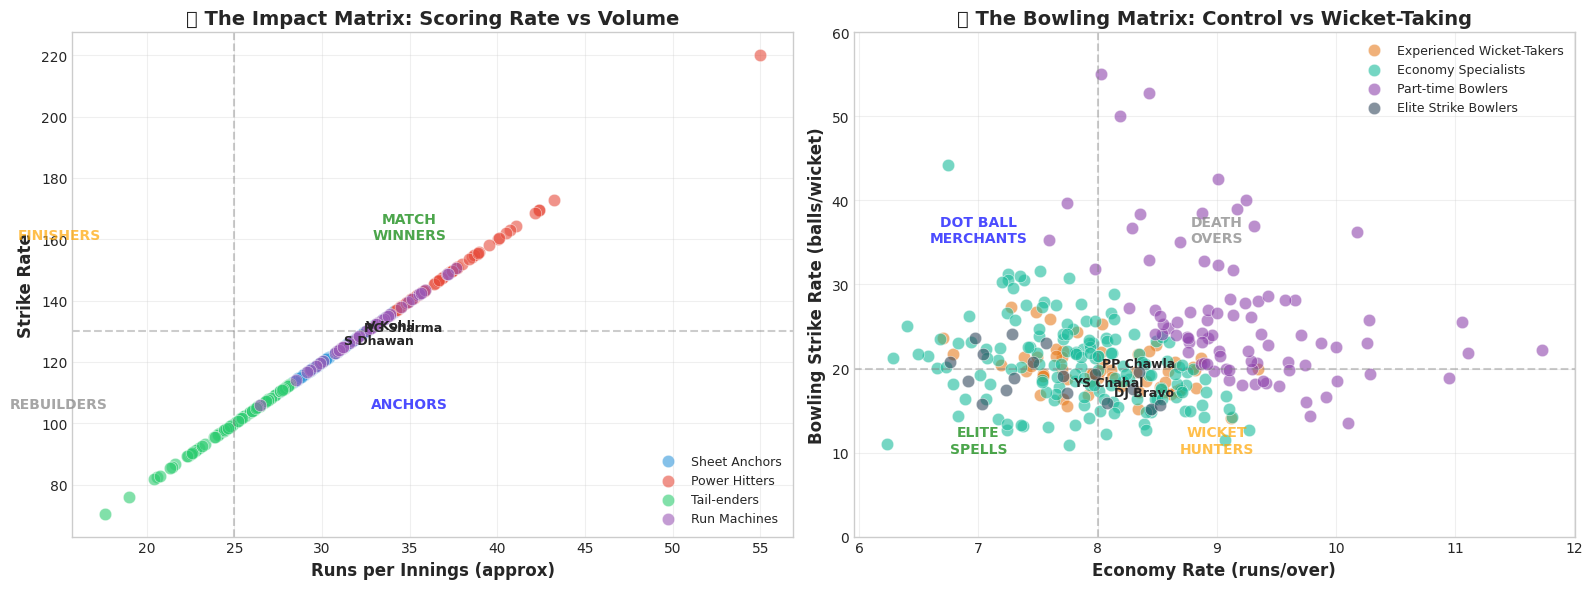

✓ Impact Matrix saved!


In [62]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
batsmen['runs_per_innings'] = batsmen['total_runs'] / (batsmen['balls_faced'] / 25)

for cluster_id in sorted(batsmen['cluster'].unique()):
    cluster_data = batsmen[batsmen['cluster'] == cluster_id]
    ax1.scatter(cluster_data['runs_per_innings'], cluster_data['strike_rate'],
               alpha=0.6, s=80, c=colors_bat[cluster_id], 
               label=batsmen_archetype_names[cluster_id], edgecolors='white', linewidth=0.5)

superstars = batsmen.nlargest(3, 'total_runs')
for name, row in superstars.iterrows():
    ax1.annotate(name, (row['runs_per_innings'], row['strike_rate']),
                fontsize=9, fontweight='bold', 
                xytext=(5, 5), textcoords='offset points')

ax1.set_xlabel('Runs per Innings (approx)', fontweight='bold')
ax1.set_ylabel('Strike Rate', fontweight='bold')
ax1.set_title('🏏 The Impact Matrix: Scoring Rate vs Volume', fontweight='bold', size=14)
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)

ax1.axhline(y=130, color='gray', linestyle='--', alpha=0.4)
ax1.axvline(x=25, color='gray', linestyle='--', alpha=0.4)
ax1.text(35, 160, 'MATCH\nWINNERS', fontsize=10, ha='center', color='green', fontweight='bold', alpha=0.7)
ax1.text(15, 160, 'FINISHERS', fontsize=10, ha='center', color='orange', fontweight='bold', alpha=0.7)
ax1.text(35, 105, 'ANCHORS', fontsize=10, ha='center', color='blue', fontweight='bold', alpha=0.7)
ax1.text(15, 105, 'REBUILDERS', fontsize=10, ha='center', color='gray', fontweight='bold', alpha=0.7)

ax2 = axes[1]
bowlers['bowling_strike_rate'] = bowlers['balls_bowled'] / bowlers['wickets'].replace(0, np.nan)

for cluster_id in sorted(bowlers['cluster'].unique()):
    cluster_data = bowlers[bowlers['cluster'] == cluster_id]
    ax2.scatter(cluster_data['economy'], cluster_data['bowling_strike_rate'],
               alpha=0.6, s=80, c=colors_bowl[cluster_id],
               label=bowler_archetype_names[cluster_id], edgecolors='white', linewidth=0.5)

elite = bowlers.nlargest(3, 'wickets')
for name, row in elite.iterrows():
    if not np.isnan(row['bowling_strike_rate']):
        ax2.annotate(name, (row['economy'], row['bowling_strike_rate']),
                    fontsize=9, fontweight='bold',
                    xytext=(5, 5), textcoords='offset points')

ax2.set_xlabel('Economy Rate (runs/over)', fontweight='bold')
ax2.set_ylabel('Bowling Strike Rate (balls/wicket)', fontweight='bold')
ax2.set_title('🎯 The Bowling Matrix: Control vs Wicket-Taking', fontweight='bold', size=14)
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 60)

ax2.axhline(y=20, color='gray', linestyle='--', alpha=0.4)
ax2.axvline(x=8.0, color='gray', linestyle='--', alpha=0.4)
ax2.text(7.0, 10, 'ELITE\nSPELLS', fontsize=10, ha='center', color='green', fontweight='bold', alpha=0.7)
ax2.text(9.0, 10, 'WICKET\nHUNTERS', fontsize=10, ha='center', color='orange', fontweight='bold', alpha=0.7)
ax2.text(7.0, 35, 'DOT BALL\nMERCHANTS', fontsize=10, ha='center', color='blue', fontweight='bold', alpha=0.7)
ax2.text(9.0, 35, 'DEATH\nOVERS', fontsize=10, ha='center', color='gray', fontweight='bold', alpha=0.7)

plt.tight_layout()
plt.savefig('../reports/figures/cricket_impact_matrix.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Impact Matrix saved!")
